# Data Importing & Cleaning
---

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ivansher/nasa-nearest-earth-objects-1910-2024")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/ivansher/nasa-nearest-earth-objects-1910-2024/versions/2


In [2]:
# Import necessary libraries.
import os
import pandas as pd

In [3]:
# Loop through all files in the specified directory and print their names.
# os.listdir(path) returns a list of all files and directories in the given path.
for file_name in os.listdir(path):
    print(file_name)

nearest-earth-objects(1910-2024).csv


In [4]:
# Read the CSV file into a pandas DataFrame.
# The file path is constructed by joining the directory path with the file name.
# Display the first few rows of the loaded dataset to inspect its structure.
data = pd.read_csv(path + '/' + file_name)
data.head()

,neo_id,name,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,orbiting_body,relative_velocity,miss_distance,is_hazardous
0,2162117,162117 (1998 SD15),19.14,0.394962,0.883161,Earth,71745.401048,5.814362e+07,False
1,2349507,349507 (2008 QY),18.50,0.530341,1.185878,Earth,109949.757148,5.580105e+07,True
2,2455415,455415 (2003 GA),21.45,0.136319,0.304818,Earth,24865.506798,6.720689e+07,False
3,3132126,(2002 PB),20.63,0.198863,0.444672,Earth,78890.076805,3.039644e+07,False
4,3557844,(2011 DW),22.70,0.076658,0.171412,Earth,56036.519484,6.311863e+07,False


In [5]:
# Display the dimensions of the DataFrame.
data.shape

(338199, 9)

In [6]:
# Display a summary of the DataFrame, including:
# - Number of non-null values in each column
# - Data types of each column
# - Overall memory usage
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338199 entries, 0 to 338198
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   neo_id                  338199 non-null  int64  
 1   name                    338199 non-null  object 
 2   absolute_magnitude      338171 non-null  float64
 3   estimated_diameter_min  338171 non-null  float64
 4   estimated_diameter_max  338171 non-null  float64
 5   orbiting_body           338199 non-null  object 
 6   relative_velocity       338199 non-null  float64
 7   miss_distance           338199 non-null  float64
 8   is_hazardous            338199 non-null  bool   
dtypes: bool(1), float64(5), int64(1), object(2)
memory usage: 21.0+ MB


In [7]:
# Convert the 'neo_id' column to 'object' (string) to prevent it from being treated as a numerical value.
# This ensures that the ID is not mistakenly used in calculations or machine learning models.
data['neo_id'] = data['neo_id'].astype(object)

# Display updated DataFrame information to confirm the data type change.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338199 entries, 0 to 338198
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   neo_id                  338199 non-null  object 
 1   name                    338199 non-null  object 
 2   absolute_magnitude      338171 non-null  float64
 3   estimated_diameter_min  338171 non-null  float64
 4   estimated_diameter_max  338171 non-null  float64
 5   orbiting_body           338199 non-null  object 
 6   relative_velocity       338199 non-null  float64
 7   miss_distance           338199 non-null  float64
 8   is_hazardous            338199 non-null  bool   
dtypes: bool(1), float64(5), object(3)
memory usage: 21.0+ MB


In [8]:
# Generate summary statistics for numerical columns in the DataFrame.
# Includes metrics like count, mean, standard deviation, min, max, and quartiles.
# Useful for understanding the distribution and spread of numerical data.
data.describe()

,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,relative_velocity,miss_distance
count,338171.000000,338171.000000,338171.000000,338199.000000,3.381990e+05
mean,22.932525,0.157812,0.352878,51060.662908,4.153535e+07
std,2.911216,0.313885,0.701869,26399.238435,2.077399e+07
min,9.250000,0.000511,0.001143,203.346433,6.745533e+03
25%,20.740000,0.025384,0.056760,30712.031471,2.494540e+07
50%,22.800000,0.073207,0.163697,47560.465474,4.332674e+07
75%,25.100000,0.189041,0.422708,66673.820614,5.933961e+07
max,33.580000,37.545248,83.953727,291781.106613,7.479865e+07


In [9]:
# Count the number of duplicate rows in the DataFrame.
# This helps identify if there are any redundant records that may need to be removed.
data.duplicated().sum()  # Returns 0, indicating that no duplicate rows exist in the dataset.

0

In [10]:
# Count the number of missing (null) values in each column of the DataFrame.
# Helps identify incomplete data that may require handling (filling or dropping missing values).
data.isnull().sum()

,0
neo_id,0
name,0
absolute_magnitude,28
estimated_diameter_min,28
estimated_diameter_max,28
orbiting_body,0
relative_velocity,0
miss_distance,0
is_hazardous,0


In [11]:
# Fill missing values in specific numerical columns with their respective column means.
# This ensures that missing values do not affect analysis or model performance.
data.fillna({
    'absolute_magnitude': data['absolute_magnitude'].mean(),
    'estimated_diameter_min': data['estimated_diameter_min'].mean(),
    'estimated_diameter_max': data['estimated_diameter_max'].mean()
}, inplace=True)

# Exploratory Data Analysis (EDA)
---

In [12]:
# Import necessary libraries.
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np

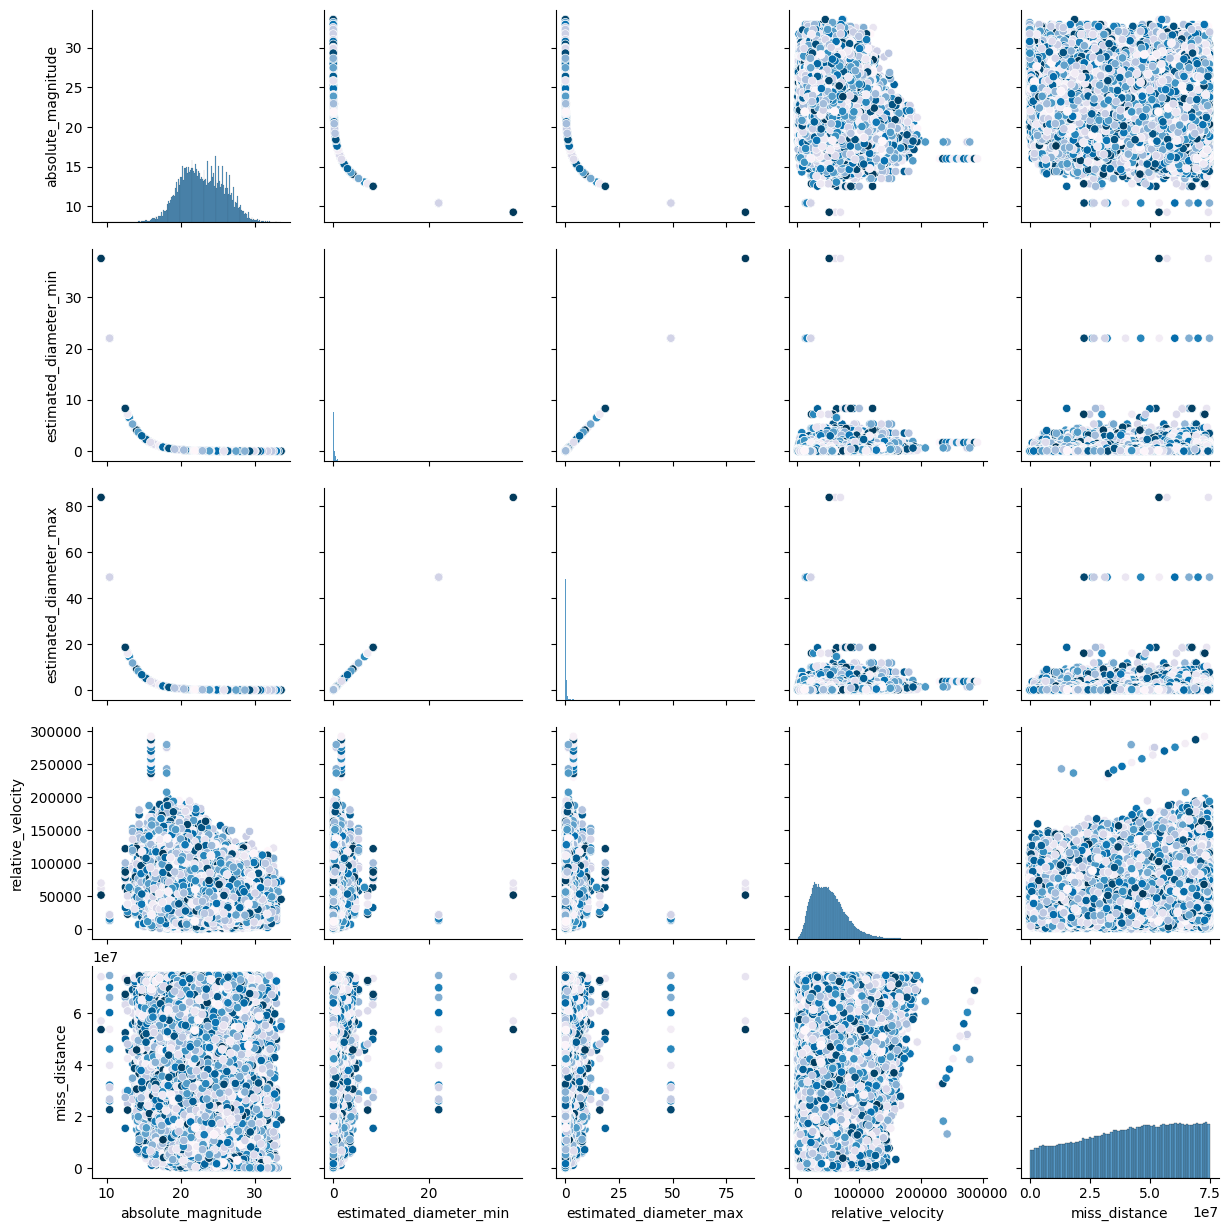

In [13]:
# Visualize pairwise relationships between selected numerical features using a pairplot.
# This helps identify correlations and patterns between different variables.
sns.pairplot(data[['absolute_magnitude', 'estimated_diameter_min', 'estimated_diameter_max',
                   'relative_velocity', 'miss_distance']],
             plot_kws={'c': np.random.rand(len(data)), 'cmap': 'PuBu'})

plt.show()

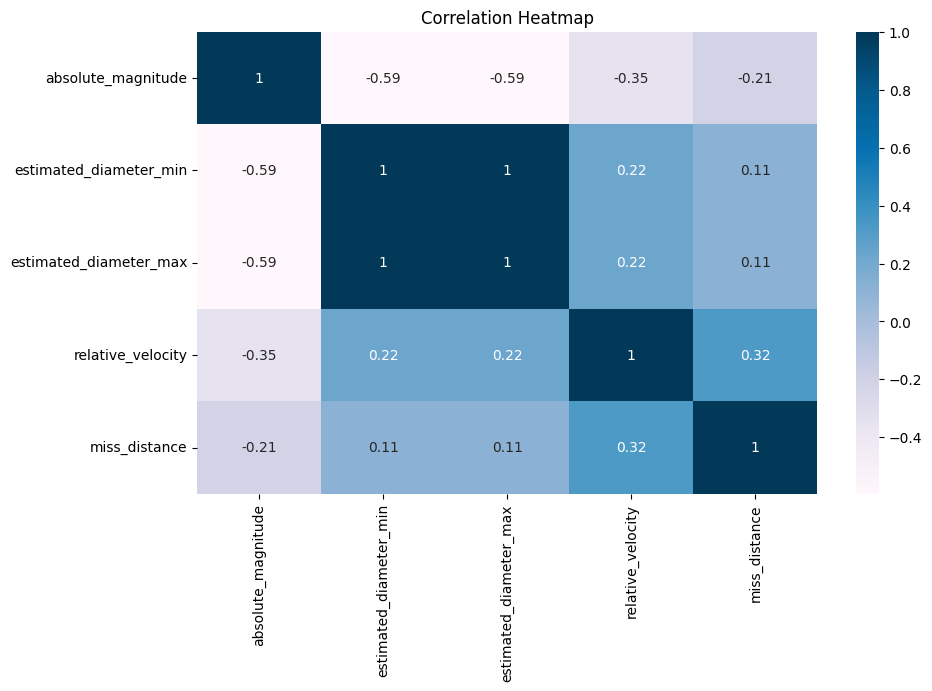

In [14]:
# Generate a heatmap to visualize the correlation between numerical features.
# Helps in understanding relationships between variables and identifying multicollinearity.
plt.figure(figsize=(10, 6))

sns.heatmap(data[['absolute_magnitude', 'estimated_diameter_min', 'estimated_diameter_max',
                  'relative_velocity', 'miss_distance']].corr(),
            annot=True,
            cmap='PuBu')

plt.title('Correlation Heatmap')
plt.show()

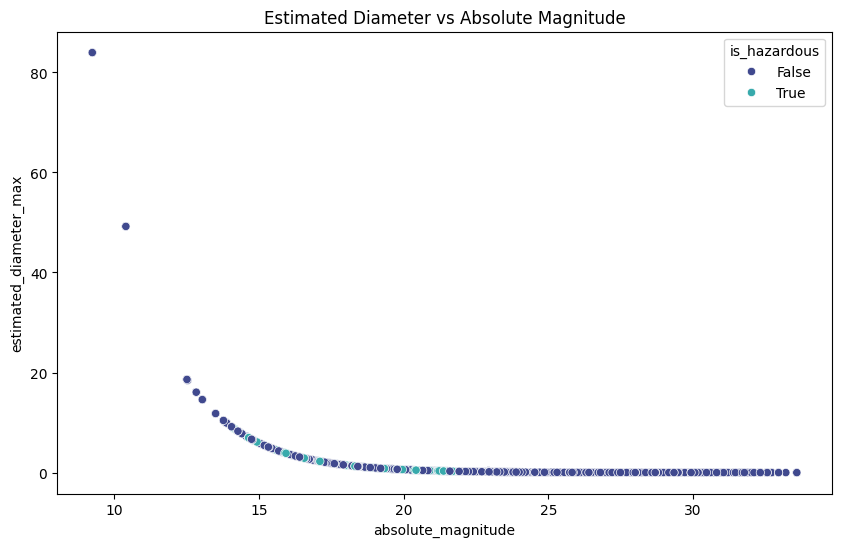

In [15]:
# Scatter plot to visualize the relationship between Estimated Diameter (max) and Absolute Magnitude.
# The hue represents whether an asteroid is hazardous or not, helping to identify patterns.
plt.figure(figsize=(10, 6))

sns.scatterplot(x='absolute_magnitude',
                y='estimated_diameter_max',
                hue='is_hazardous',
                data=data,
                palette='mako')

plt.title('Estimated Diameter vs Absolute Magnitude')
plt.show()

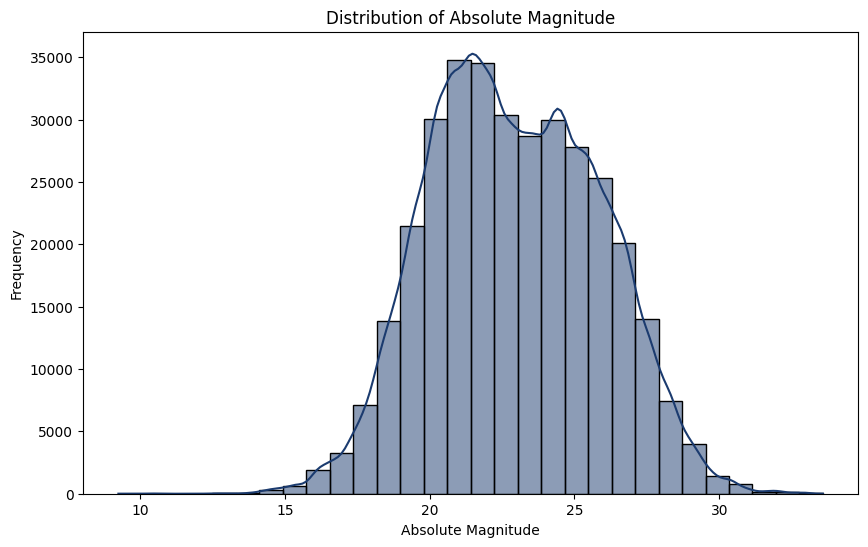

count    338199.000000
mean         22.932525
std           2.911096
min           9.250000
25%          20.740000
50%          22.800000
75%          25.100000
max          33.580000
Name: absolute_magnitude, dtype: float64


In [16]:
# Visualize the distribution of Absolute Magnitude using a histogram with a KDE curve.
# Helps in understanding the spread and density of values in the dataset.
plt.figure(figsize=(10, 6))

sns.histplot(data['absolute_magnitude'],
             kde=True,
             bins=30,
             color='#1B3B6F')

plt.title('Distribution of Absolute Magnitude')
plt.xlabel('Absolute Magnitude')
plt.ylabel('Frequency')
plt.show()

# Print summary statistics of Absolute Magnitude to analyze key statistical measures.
print(data['absolute_magnitude'].describe())

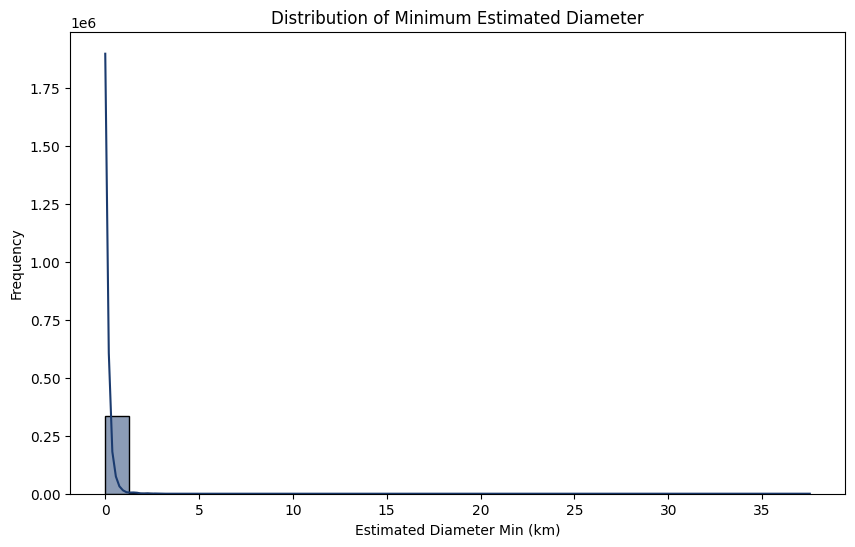

count    338199.000000
mean          0.157812
std           0.313872
min           0.000511
25%           0.025384
50%           0.073207
75%           0.189041
max          37.545248
Name: estimated_diameter_min, dtype: float64


In [17]:
# Visualize the distribution of Minimum Estimated Diameter using a histogram with a KDE curve.
# This helps in understanding the spread and density of the minimum estimated diameter values.
plt.figure(figsize=(10, 6))

sns.histplot(data['estimated_diameter_min'],
             kde=True,
             bins=30,
             color='#1B3B6F')

plt.title('Distribution of Minimum Estimated Diameter')
plt.xlabel('Estimated Diameter Min (km)')
plt.ylabel('Frequency')
plt.show()

# Print summary statistics of the Minimum Estimated Diameter to analyze key statistical measures.
print(data['estimated_diameter_min'].describe())

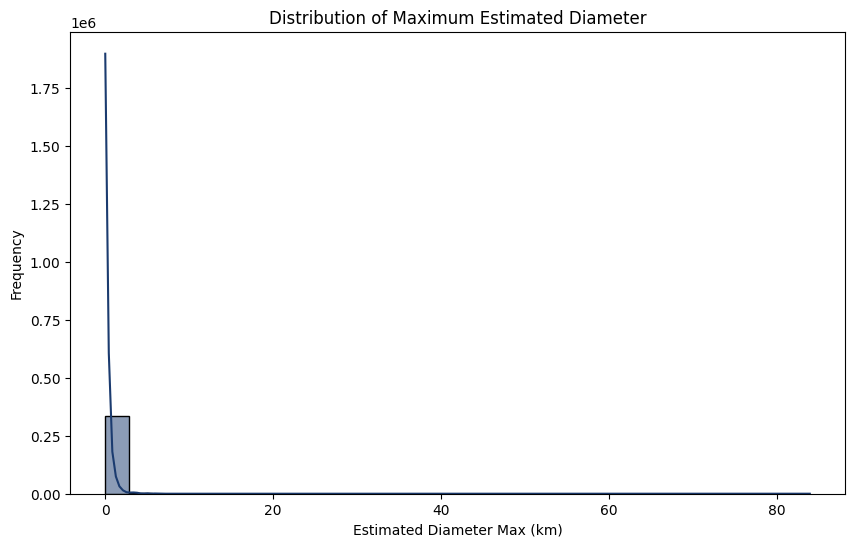

count    338199.000000
mean          0.352878
std           0.701839
min           0.001143
25%           0.056760
50%           0.163697
75%           0.422708
max          83.953727
Name: estimated_diameter_max, dtype: float64


In [18]:
# Visualize the distribution of Maximum Estimated Diameter using a histogram with a KDE curve.
# This helps in understanding the spread and density of the maximum estimated diameter values.
plt.figure(figsize=(10, 6))

sns.histplot(data['estimated_diameter_max'],
             kde=True,
             bins=30,
             color='#1B3B6F')

plt.title('Distribution of Maximum Estimated Diameter')
plt.xlabel('Estimated Diameter Max (km)')
plt.ylabel('Frequency')
plt.show()

# Print summary statistics of the Maximum Estimated Diameter to analyze key statistical measures.
print(data['estimated_diameter_max'].describe())

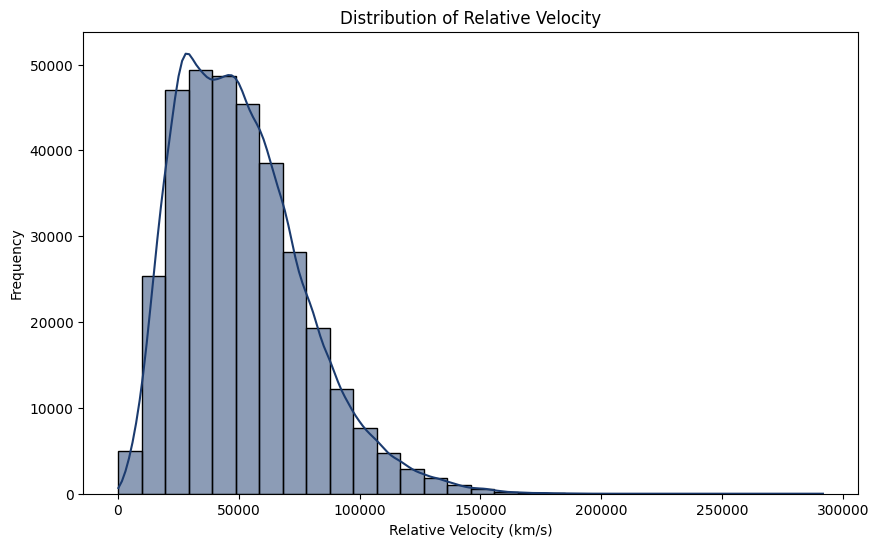

count    338199.000000
mean      51060.662908
std       26399.238435
min         203.346433
25%       30712.031471
50%       47560.465474
75%       66673.820614
max      291781.106613
Name: relative_velocity, dtype: float64


In [19]:
# Visualize the distribution of Relative Velocity using a histogram with a KDE curve.
# This helps in understanding the spread and density of relative velocity values.
plt.figure(figsize=(10, 6))

sns.histplot(data['relative_velocity'],
             kde=True,
             bins=30,
             color='#1B3B6F')

plt.title('Distribution of Relative Velocity')
plt.xlabel('Relative Velocity (km/s)')
plt.ylabel('Frequency')
plt.show()

# Print summary statistics of Relative Velocity to analyze key statistical measures.
print(data['relative_velocity'].describe())

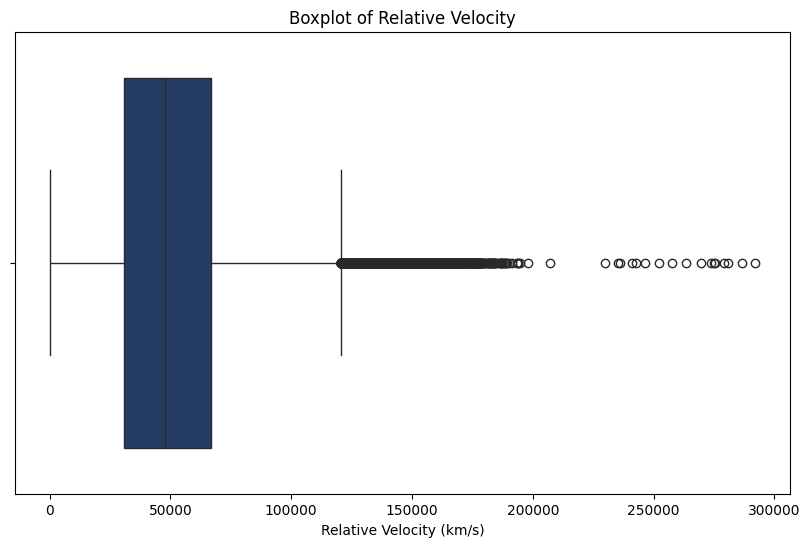

In [20]:
# Create a boxplot to visualize the distribution of Relative Velocity.
# This helps in identifying outliers, median, and the overall spread of the data.
plt.figure(figsize=(10, 6))

sns.boxplot(x=data['relative_velocity'], color='#1B3B6F')

plt.title('Boxplot of Relative Velocity')
plt.xlabel('Relative Velocity (km/s)')
plt.show()

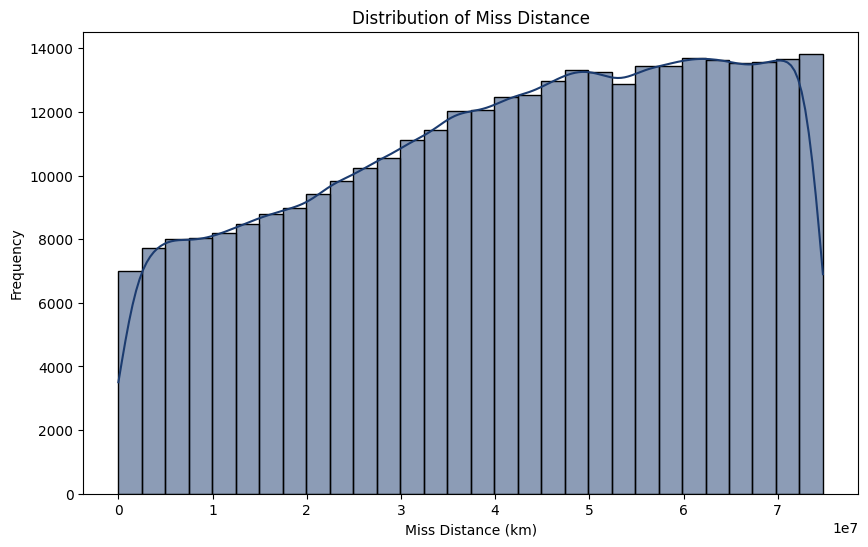

count    3.381990e+05
mean     4.153535e+07
std      2.077399e+07
min      6.745533e+03
25%      2.494540e+07
50%      4.332674e+07
75%      5.933961e+07
max      7.479865e+07
Name: miss_distance, dtype: float64


In [21]:
# Visualize the distribution of Miss Distance using a histogram with a KDE curve.
# This helps in understanding the spread and density of miss distance values.
plt.figure(figsize=(10, 6))

sns.histplot(data['miss_distance'],
             kde=True,
             bins=30,
             color='#1B3B6F')

plt.title('Distribution of Miss Distance')
plt.xlabel('Miss Distance (km)')
plt.ylabel('Frequency')
plt.show()

# Print summary statistics of Miss Distance to analyze key statistical measures.
print(data['miss_distance'].describe())

<ipython-input-22-8ada7558342a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data,


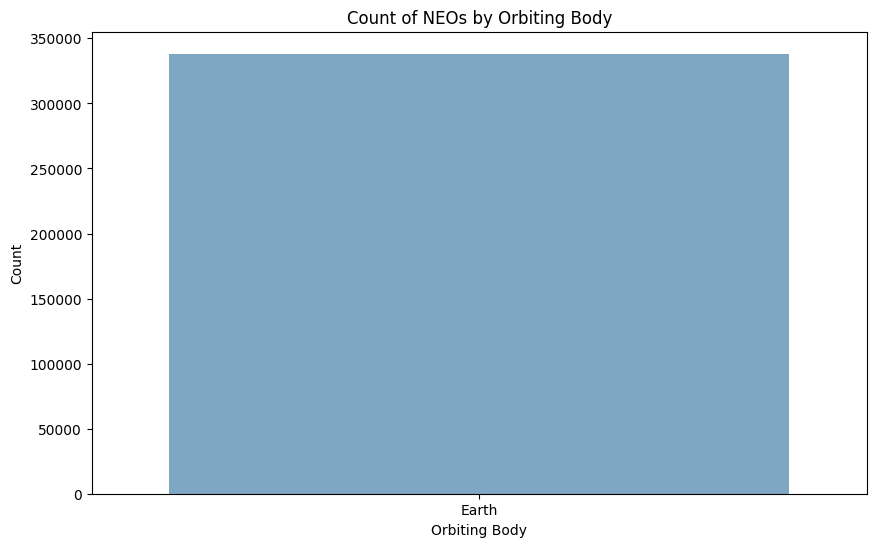

orbiting_body
Earth    338199
Name: count, dtype: int64


In [22]:
# Visualize the count of Near-Earth Objects (NEOs) by their orbiting body using a count plot.
# This helps in understanding the distribution of NEOs across different orbiting bodies.
plt.figure(figsize=(10, 6))

sns.countplot(data=data,
              x='orbiting_body',
              order=data['orbiting_body'].value_counts().index,
              palette='PuBu')

plt.title('Count of NEOs by Orbiting Body')
plt.xlabel('Orbiting Body')
plt.ylabel('Count')
plt.show()

# Print the count of NEOs for each orbiting body to analyze their distribution.
print(data['orbiting_body'].value_counts())

In [23]:
# Identify and visualize the top 10 closest Near-Earth Objects (NEOs) based on miss distance.
# This helps in understanding which objects have come the closest to Earth.
top_10_closest = data.nsmallest(10, 'miss_distance')

fig5 = px.bar(top_10_closest,
              x='miss_distance',
              y='name',
              title='Top 10 Closest NEOs to Earth',
              text_auto=True,
              labels={'miss_distance': 'Miss Distance (km)', 'name': 'NEO Name'},
              color_discrete_sequence=['#1B3B6F'],
              width=1200,
              height=800)

fig5.show()

<ipython-input-24-742376354267>:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-24-742376354267>:24: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



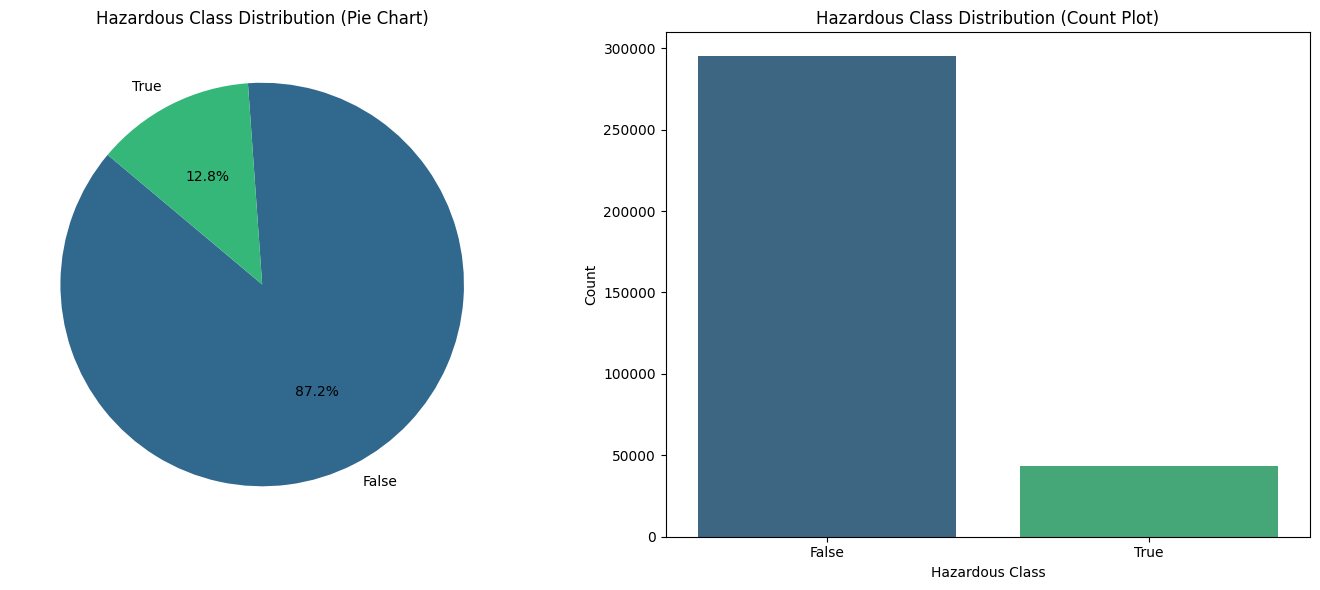

In [24]:
# Visualize the distribution of hazardous vs. non-hazardous Near-Earth Objects (NEOs)
# using both a pie chart and a count plot for better comparison.
hazardous_counts = data['is_hazardous'].value_counts().sort_index()

palette = sns.color_palette("viridis", n_colors=len(hazardous_counts))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Pie chart to show the proportion of hazardous vs. non-hazardous NEOs.
ax1.pie(hazardous_counts,
        labels=data["is_hazardous"].unique(),
        autopct='%1.1f%%',
        startangle=140,
        colors=palette)

ax1.set_title('Hazardous Class Distribution (Pie Chart)')

# Count plot to show the actual number of hazardous vs. non-hazardous NEOs.
sns.countplot(x='is_hazardous', data=data, ax=ax2, palette=palette)

ax2.set_title('Hazardous Class Distribution (Count Plot)')
ax2.set_xlabel('Hazardous Class')
ax2.set_ylabel('Count')
ax2.set_xticklabels(data["is_hazardous"].unique())

plt.tight_layout()
plt.show()

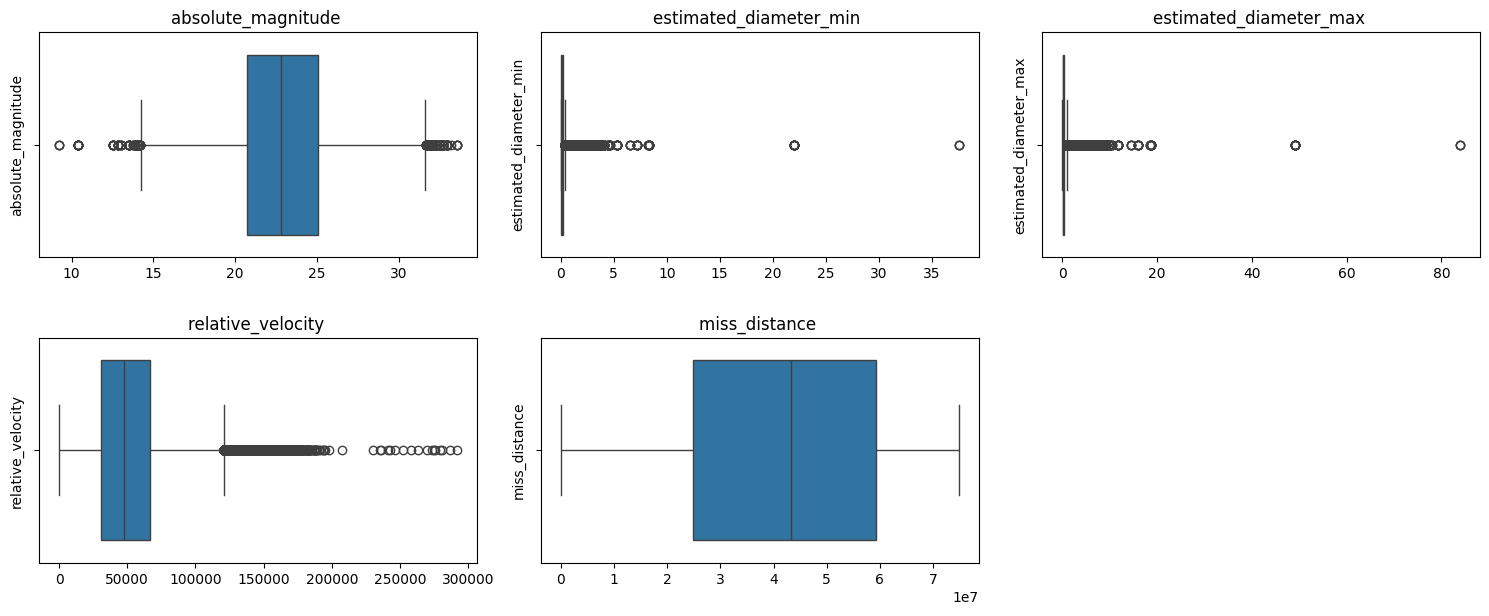

In [25]:
# Generate boxplots for all numerical features to identify outliers and distribution patterns.
plt.figure(figsize=(15, 15))

# Loop through all numerical features in the dataset.
for i, feature in enumerate(data.select_dtypes(include='number').columns):
    plt.subplot(5, 3, i+1)

    sns.boxplot(data=data, x=feature)

    plt.title(f'{feature} ')
    plt.xlabel(' ')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

In [26]:
# Removes outliers from a specified numerical feature using the Interquartile Range (IQR) method.

def remove_outliers(feature):
    """
    Steps:
    1. Uses the global 'data' variable to modify the dataset directly.
    2. Calculates Q1 (25th percentile) and Q3 (65th percentile) instead of the standard 75th percentile.
    3. Computes the Interquartile Range (IQR) as the difference between Q3 and Q1.
    4. Defines outlier thresholds:
       - Upper limit = Q3 + (1.5 * IQR)
       - Lower limit = Q1 - (1.5 * IQR)
    5. Filters the dataset to retain only values within the defined range.
    """
    global data

    # Calculate the first quartile (Q1) and third quartile (Q3)
    q1 = data[feature].quantile(0.25)
    q3 = data[feature].quantile(0.65)

    iqr = q3 - q1

    # Define upper and lower limits for outlier detection
    upper_limit = q3 + (1.5 * iqr)
    lower_limit = q1 - (1.5 * iqr)

    # Filter the dataset to keep only values within the defined range
    data = data.loc[(data[feature] < upper_limit) & (data[feature] > lower_limit)]

In [27]:
# Removing Outliers from Selected Features
features_list = ["absolute_magnitude", "estimated_diameter_min", "estimated_diameter_max", "relative_velocity"]

for feature in features_list:
    remove_outliers(feature)

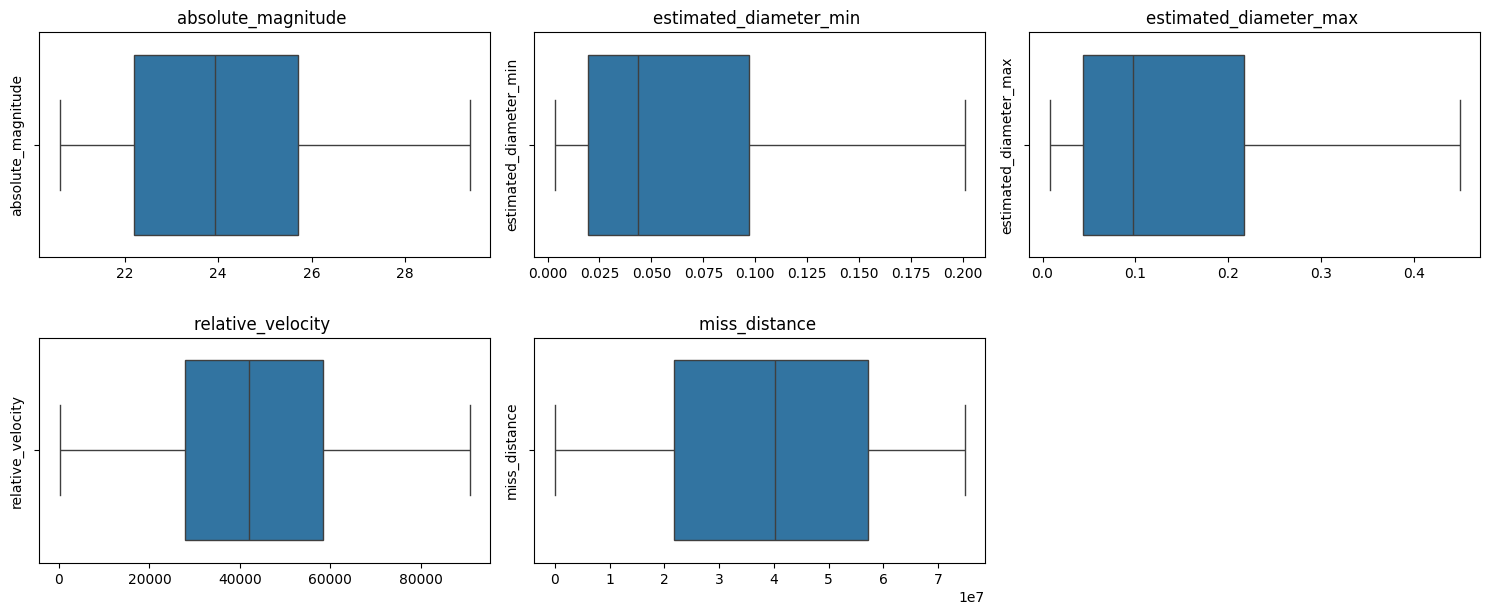

In [28]:
plt.figure(figsize=(15, 15))

# Loop through each numerical feature and plot a boxplot
for i, feature in enumerate(data.select_dtypes(include='number').columns):
    plt.subplot(5, 3, i+1)
    sns.boxplot(data=data, x=feature)
    plt.title(f'{feature} ')
    plt.xlabel(' ')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

# Data Preprocessing
---

In [29]:
# Import necessary libraries.
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

## Feature Selection

In [30]:
# Feature Selection: Dropping Irrelevant Features

# Exclude features that do not have a significant impact on the target variable.
X = data.drop(["neo_id", "name", "orbiting_body", "is_hazardous"], axis=1)

# Define the target variable
y = data["is_hazardous"]

## Handling Imblance Dataset

In [31]:
# Display the distribution of the target variable before any processing
print(f'Original y distribution:\n{y.value_counts()}')

Original y distribution:
is_hazardous
False    225505
True      18975
Name: count, dtype: int64


In [32]:
# Initialize SMOTE with a fixed random state for reproducibility
smote = SMOTE(random_state=42)

# Resample the dataset to balance the classes
X, y = smote.fit_resample(X, y)

In [33]:
# Display the new class distribution
print(f'Balanced y distribution:\n{y.value_counts()}')

Balanced y distribution:
is_hazardous
False    225505
True     225505
Name: count, dtype: int64


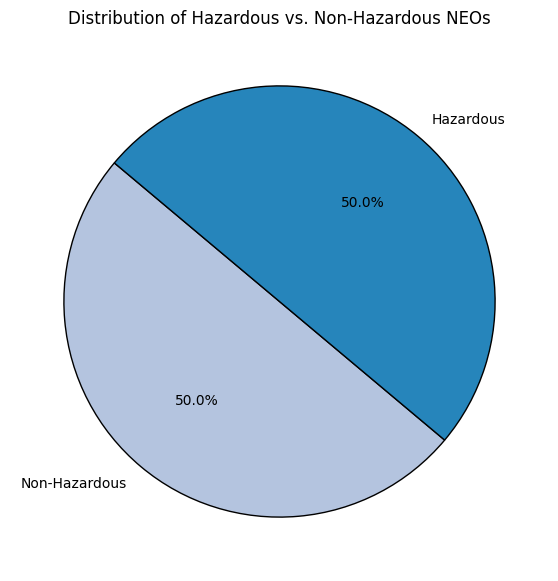

In [34]:
# Count the number of occurrences for each class
hazardous_counts = y.value_counts()

# Select colors from the "PuBu" color palette
colors = sns.color_palette("PuBu", n_colors=len(hazardous_counts))

# Create a pie chart
plt.figure(figsize=(7, 7))
plt.pie(hazardous_counts, labels=['Non-Hazardous', 'Hazardous'],
        autopct='%1.1f%%', startangle=140, colors=colors, wedgeprops={'edgecolor': 'black'})

plt.title('Distribution of Hazardous vs. Non-Hazardous NEOs')
plt.show()

## Normalization

In [35]:
# Convert X back to a DataFrame with the original column names
X = pd.DataFrame(X, columns=data.drop(["neo_id", "name", "orbiting_body", "is_hazardous"], axis=1).columns)

# Select only numerical features
numerical_features = X.select_dtypes(include=['number'])

# Apply StandardScaler only to numerical features
scaler = StandardScaler()
scaled_X = scaler.fit_transform(numerical_features)

# Convert the scaled data back to a DataFrame with the original column names
scaled_X = pd.DataFrame(scaled_X, columns=numerical_features.columns)

# Display the first 5 rows of the scaled data
print("Scaled Data:\n", scaled_X.head())

Scaled Data:
    absolute_magnitude  estimated_diameter_min  estimated_diameter_max  \
0           -0.649242                0.600697                0.600697   
1           -1.039512                1.659643                1.659643   
2           -0.054318               -0.409422               -0.409422   
3            1.040342               -1.257283               -1.257283   
4           -0.625445                0.548160                0.548160   

   relative_velocity  miss_distance  
0          -1.211488       1.338998  
1           1.643867      -0.420420  
2           0.435990       1.143593  
3          -0.016371       0.177458  
4           0.532012      -0.569420  


## Transformation

In [36]:
# Convert the target variable 'is_hazardous' from categorical ('True', 'False') to numerical (1, 0)
y = pd.Series(y).map({False: 0, True: 1}).to_numpy()
y

array([0, 0, 0, ..., 1, 1, 1])

## Train Test Split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y, test_size=0.2)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((360808, 5), (360808,), (90202, 5), (90202,))

# Model Training and Evaluation
---

In [38]:
# Import necessary libraries.
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [39]:
def model_train_test(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)

    # Predictions
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)

    # Accuracy scores
    train_accuracy = accuracy_score(y_train, pred_train)
    test_accuracy = accuracy_score(y_test, pred_test)

    print(f"Train Accuracy: {train_accuracy:.2%}")
    print(f"Test Accuracy: {test_accuracy:.2%}")

    # Classification report
    print("\nClassification Report (Test Data):")
    print(classification_report(y_test, pred_test))

    # Other metrics
    precision = precision_score(y_test, pred_test, average='micro')
    recall = recall_score(y_test, pred_test, average='micro')
    f1 = f1_score(y_test, pred_test, average='micro')


    print(f"Precision (Test): {precision:.2f}")
    print(f"Recall (Test): {recall:.2f}")
    print(f"F1-score (Test): {f1:.2f}")

In [40]:
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=15)

## Random Forest Model

In [41]:
# Initialize and train RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators=350, max_features='sqrt', random_state=100)
model_train_test(RF_model, X_train, y_train, X_test, y_test)

Train Accuracy: 100.00%
Test Accuracy: 97.18%

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     45101
           1       0.97      0.97      0.97     45101

    accuracy                           0.97     90202
   macro avg       0.97      0.97      0.97     90202
weighted avg       0.97      0.97      0.97     90202

Precision (Test): 0.97
Recall (Test): 0.97
F1-score (Test): 0.97


In [43]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, RF_model.predict(X_test))

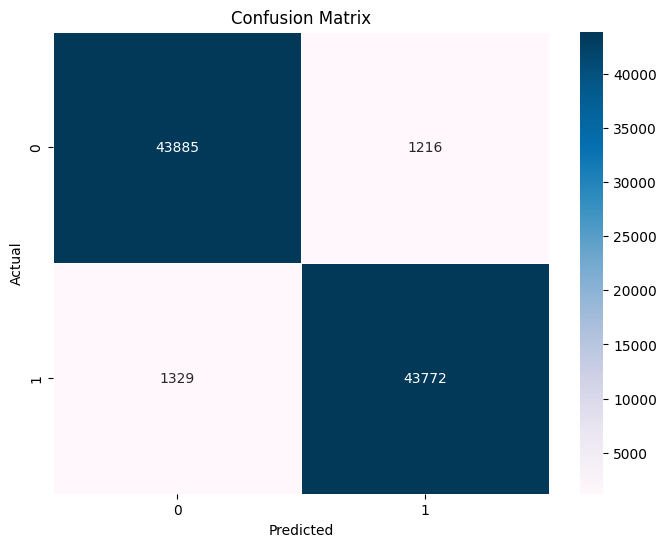

In [44]:
# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='PuBu', linewidths=0.5)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Logistic Regression Model

In [45]:
# Initialize and train Logistic Regression model
log_model = LogisticRegression(max_iter=500, random_state=100)
model_train_test(log_model, X_train, y_train, X_test, y_test)

Train Accuracy: 64.29%
Test Accuracy: 64.29%

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.63      0.69      0.66     45101
           1       0.66      0.60      0.63     45101

    accuracy                           0.64     90202
   macro avg       0.64      0.64      0.64     90202
weighted avg       0.64      0.64      0.64     90202

Precision (Test): 0.64
Recall (Test): 0.64
F1-score (Test): 0.64


In [46]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, log_model.predict(X_test))

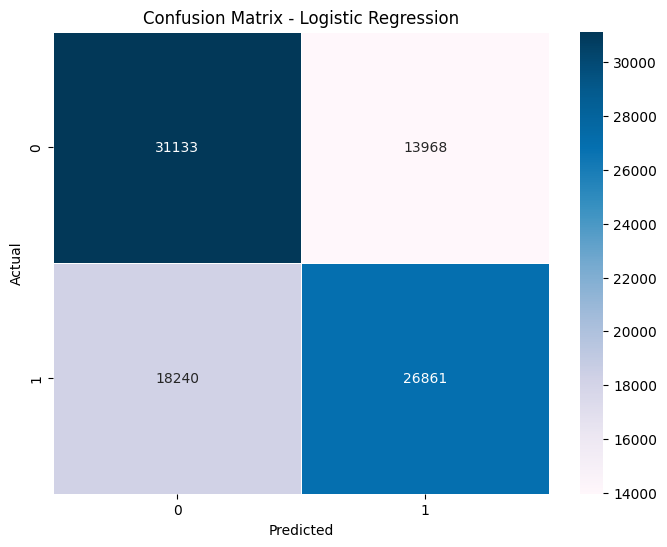

In [47]:
# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='PuBu', linewidths=0.5)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

## Decision Tree Model

In [48]:
# Initialize and train Decision Tree model
dt_model = DecisionTreeClassifier(max_depth=10, random_state=100)
model_train_test(dt_model, X_train, y_train, X_test, y_test)

Train Accuracy: 92.82%
Test Accuracy: 92.72%

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.98      0.87      0.92     45101
           1       0.88      0.99      0.93     45101

    accuracy                           0.93     90202
   macro avg       0.93      0.93      0.93     90202
weighted avg       0.93      0.93      0.93     90202

Precision (Test): 0.93
Recall (Test): 0.93
F1-score (Test): 0.93


In [49]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, dt_model.predict(X_test))

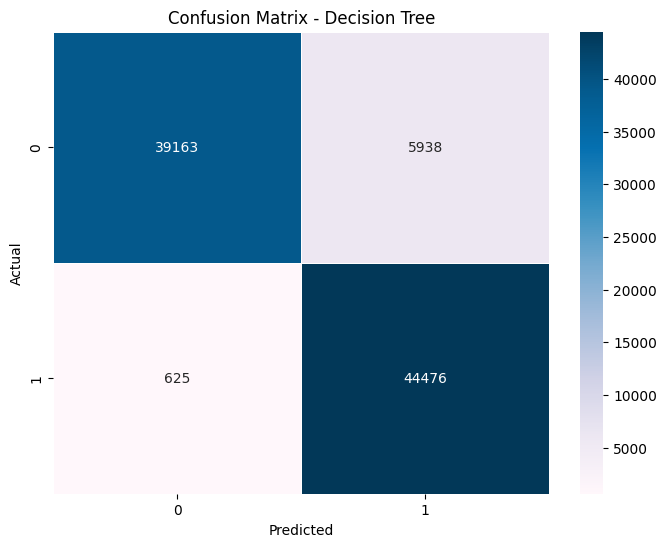

In [50]:
# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='PuBu', linewidths=0.5)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

## The Final Comparison

In [51]:
# Dictionary of trained models
models = {
    "Random Forest": RF_model,
    "Logistic Regression": log_model,
    "Decision Tree": dt_model,
}

# Dictionary to store evaluation metrics
results = {"Model": [], "Accuracy": [], "Precision": [], "Recall": [], "F1-score": []}

# Evaluate each model on the test set
for name, model in models.items():
    y_pred = model.predict(X_test)

    results["Model"].append(name)
    results["Accuracy"].append(accuracy_score(y_test, y_pred))
    results["Precision"].append(precision_score(y_test, y_pred, average='micro'))
    results["Recall"].append(recall_score(y_test, y_pred, average='micro'))
    results["F1-score"].append(f1_score(y_test, y_pred, average='micro'))

# Convert results into a DataFrame
data_results = pd.DataFrame(results)

# Print the comparison table
print(data_results)

                 Model  Accuracy  Precision    Recall  F1-score
0        Random Forest  0.971786   0.971786  0.971786  0.971786
1  Logistic Regression  0.642935   0.642935  0.642935  0.642935
2        Decision Tree  0.927241   0.927241  0.927241  0.927241


<Figure size 1200x600 with 0 Axes>

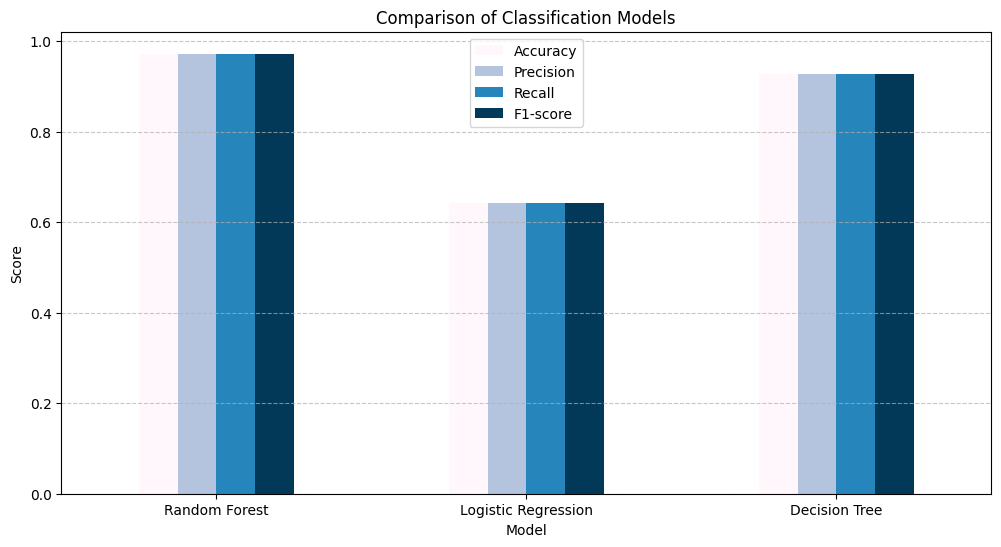

In [52]:
# Plot the comparison bar chart
plt.figure(figsize=(12, 6))
data_results.set_index("Model").plot(kind="bar", colormap="PuBu", figsize=(12, 6))
plt.title("Comparison of Classification Models")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.legend(loc="best")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

## The ROC Curve for All Models

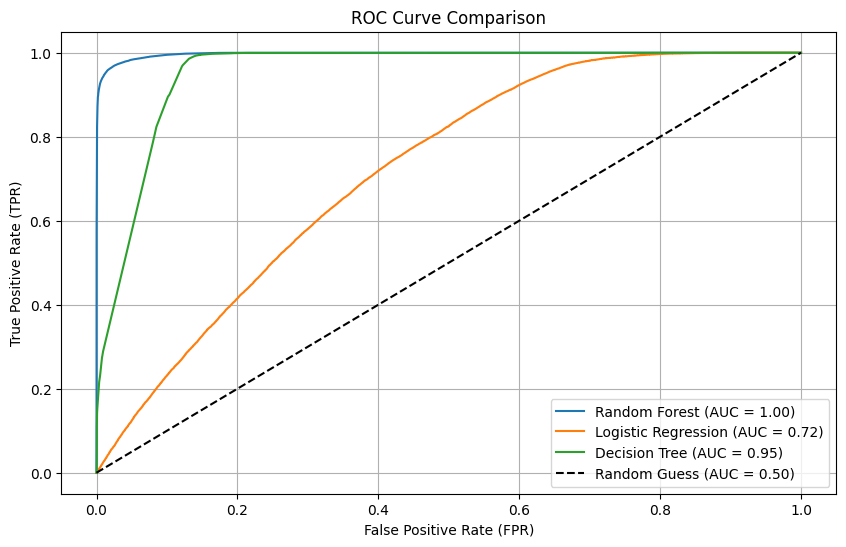

In [53]:
from sklearn.metrics import roc_curve, auc

# Initialize the plot
plt.figure(figsize=(10, 6))

# Dictionary of models
models = {
    "Random Forest": RF_model,
    "Logistic Regression": log_model,
    "Decision Tree": dt_model,
}

# Loop through each model and plot its ROC curve
for name, model in models.items():
    # Get prediction probabilities if available
    if hasattr(model, "predict_proba"):
        y_probs = model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
    else:
        y_probs = model.decision_function(X_test)  # Use decision function for SVC

    # Compute ROC curve values
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

# Plot the random baseline (no discrimination)
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess (AUC = 0.50)")

# Labels and Title
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve Comparison")
plt.legend(loc="lower right")
plt.grid()

# Show the plot
plt.show()